In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Importing the data



In [2]:
activity = pd.read_csv('./data/dailyActivity_merged.csv')
calories = pd.read_csv('./data/dailyCalories_merged.csv')
intensities = pd.read_csv('./data/dailyIntensities_merged.csv')
heartrate = pd.read_csv('./data/heartrate_seconds_merged.csv')
sleep = pd.read_csv('./data/sleepDay_merged.csv')
weight = pd.read_csv('./data/weightLogInfo_merged.csv')

In [42]:
activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


# 1. Formatting the data 

In [5]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'])
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'])
heartrate['Time'] = pd.to_datetime(heartrate['Time'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

In [82]:
activity['Id'].nunique()

33

In [33]:
activity[['TotalSteps','TotalDistance', 'Calories','SedentaryMinutes']].describe()

,TotalSteps,TotalDistance,Calories,SedentaryMinutes
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,2303.609574,991.210638
std,5087.150742,3.924606,718.166862,301.267437
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,1828.500000,729.750000
50%,7405.500000,5.245000,2134.000000,1057.500000
75%,10727.000000,7.712500,2793.250000,1229.500000
max,36019.000000,28.030000,4900.000000,1440.000000


In [49]:
sleep[['TotalMinutesAsleep', 'TotalTimeInBed']].describe()

,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000
mean,419.467312,458.639225
std,118.344679,127.101607
min,58.000000,61.000000
25%,361.000000,403.000000
50%,433.000000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


# 2. The Analysis

1. On average fitbit users take 7638 steps and walk around 5.5km everyday.
2. On average fitbit users consume 2303 calories.
3. On average fitbit users remain sedentary for 991 minutes
4. On average fitbit users sleep for 419 minutes i.e 7hrs per day and the average bedtime is 458 minutes.

# 3. Visuzalization of the above data

<AxesSubplot:xlabel='TotalSteps', ylabel='Count'>

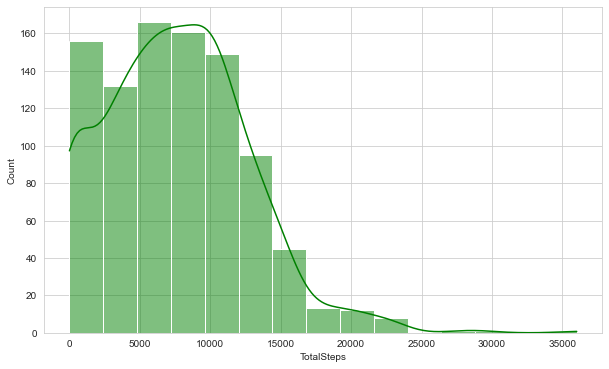

In [46]:

plt.figure(figsize=(10,6))
sns.histplot(activity, x='TotalSteps', bins=15, kde=True, color='green')



<AxesSubplot:xlabel='TotalDistance', ylabel='Count'>

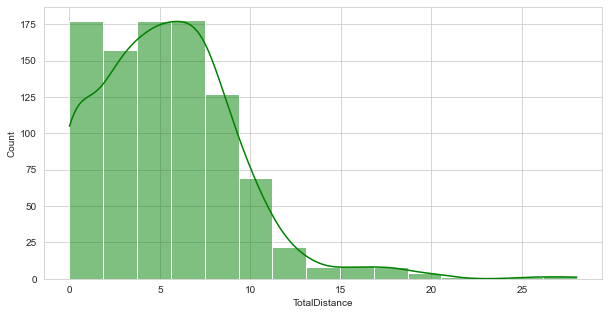

In [47]:
# Normal distribution of distance
plt.figure(figsize=(10,5))
sns.histplot(activity, x='TotalDistance', bins=15, kde=True, color='green')

<AxesSubplot:xlabel='Calories', ylabel='Count'>

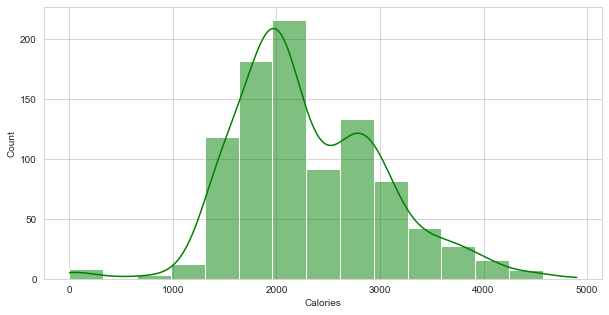

In [48]:
# Normal distribution of calories consumed by fitbit users
plt.figure(figsize=(10,5))
sns.histplot(activity, x='Calories', bins=15, kde=True, color='green')

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='Count'>

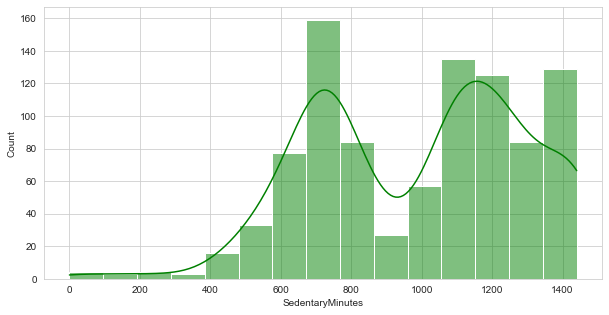

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(activity, x='SedentaryMinutes', bins=15, kde=True, color='green')

# 4. The intepretation of above Histograms

1. Most fitbit user walk between 2500- 14000 steps everday
2. Most fitbit user walk betweeen 2.5km to 10km everyday
3. Most fitbit users burn between 1000 to 3000 calories everyday
4. We have bimodal distribution curve for sendentary time. This might be because people remain sendentary mostly at night during sleep and during the day

<AxesSubplot:title={'center':'Coorelation'}>

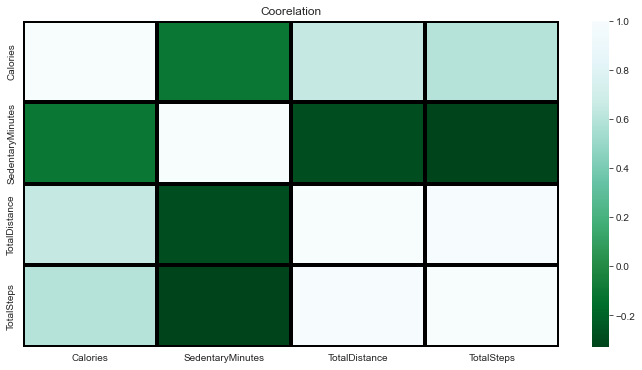

In [78]:
plt.figure(figsize=(12,6))
plt.title("Coorelation")
sns.heatmap(activity[['Calories', 'SedentaryMinutes', 'TotalDistance', 'TotalSteps']].corr(), cmap='BuGn_r', linecolor='black', linewidths=4)

# 5. The intepretation of above Clustermap
1. There is a negative coorelation between sendentary minutes and other varibables like total steps, calories and total distance. This makes sense because more activity like more steps will lead to less sedentary time, more distance and more calories burning.



,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,327.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,384.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,412.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,340.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN
936,8877689391,2016-05-09,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN
937,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN
938,8877689391,2016-05-11,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN


# 6. Sleep data analysis

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='Count'>

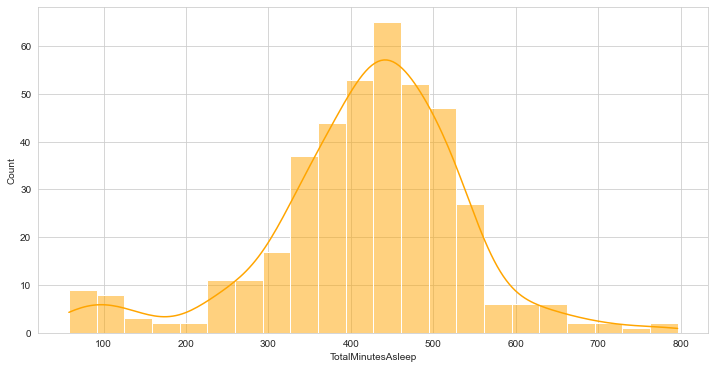

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(sleep, x= 'TotalMinutesAsleep', kde=True, color='orange' )